In [4]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns

In [6]:
#create a dataframe from each excel sheet.

filepath = "Cleaned Files/Copy of mort_cleaned.xlsx"

xls = pd.ExcelFile(filepath)

df_Unintentional_injuries  = pd.read_excel(xls,'Unintentional injuries')



In [7]:
filepath2 = "Cleaned Files/NIH Data Alcohol Consumption.csv"
filepath3 = "Cleaned Files/NIH Data FIPS.csv"
filepath4 = "Cleaned Files/NIH Beverage Codes.csv"

df_nih = pd.read_csv(filepath2)
df_beverage_codes = pd.read_csv(filepath4)
df_fips_codes = pd.read_csv(filepath3)
df_nih['Gallons of ethanol per capita age 21 and older'] = df_nih['Gallons of ethanol per capita age 21 and older']/10000

In [8]:
df_nih.head()

,Year,FIPS,Type of beverage,Gallons of beverage,Gallons of ethanol,Population (14 and older),Gallons of ethanol per capita age 14 and older,Decile for per capita consumption age 14 and older,Population (21 and older),Gallons of ethanol per capita age 21 and older,Decile for per capita consumption age 21 and older,Type of data source,Time-varying alcohol by volume (ABV),Gallons of ethanol derived from time-varying ABV
0,1970,1,1,3863000,1738350,2499000,6956,9.0,2020000,0.8606,9.0,.,.,.
1,1970,1,2,1412000,225920,2499000,904,9.0,2020000,0.1118,9.0,.,.,.
2,1970,1,3,33098000,1489410,2499000,5960,10.0,2020000,0.7373,10.0,.,.,.
3,1970,1,4,.,3453680,2499000,13820,10.0,2020000,1.7097,10.0,.,.,.
4,1970,2,1,945000,425250,205000,20744,1.0,165000,2.5773,1.0,.,.,.


In [9]:
df_Unintentional_injuries.head()

,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"
0,United States,NaN,"23.85 (23.26, 24.41)","21.50 (21.07, 21.90)","19.53 (19.17, 19.94)","18.85 (18.49, 19.28)","18.60 (18.23, 19.15)","19.30 (18.90, 19.91)","19.24 (18.80, 19.84)","19.12 (18.61, 19.81)","-19.82 (-22.24, -17.03)"
1,Alabama,1.0,"32.87 (31.98, 33.76)","28.39 (27.81, 28.99)","26.44 (25.93, 27.00)","24.97 (24.44, 25.61)","24.06 (23.52, 24.83)","24.83 (24.20, 25.69)","23.81 (23.22, 24.55)","23.02 (22.33, 23.84)","-29.97 (-32.43, -27.19)"
2,"Autauga County, Alabama",1001.0,"34.19 (31.59, 36.90)","30.87 (28.62, 33.23)","28.14 (26.27, 30.01)","26.20 (24.50, 28.01)","24.80 (23.10, 26.70)","25.34 (23.56, 27.16)","24.72 (22.80, 26.72)","24.10 (22.01, 26.09)","-29.51 (-36.58, -21.74)"
3,"Baldwin County, Alabama",1003.0,"29.12 (27.37, 30.86)","25.73 (24.32, 27.24)","23.20 (21.91, 24.47)","21.48 (20.38, 22.77)","20.47 (19.34, 21.68)","21.51 (20.32, 22.78)","19.94 (18.80, 21.17)","19.60 (18.40, 20.93)","-32.70 (-37.91, -26.20)"
4,"Barbour County, Alabama",1005.0,"42.54 (39.67, 45.62)","36.98 (34.50, 39.69)","34.53 (32.33, 36.77)","30.36 (28.33, 32.43)","27.84 (25.87, 29.89)","27.38 (25.38, 29.33)","25.36 (23.41, 27.47)","24.56 (22.56, 26.75)","-42.26 (-47.56, -35.94)"


In [10]:
df_nih_merged = pd.merge(df_nih, df_beverage_codes, how="left", left_on = 'Type of beverage', right_on = 'Beverage ID')
df_nih_merged = pd.merge(df_nih_merged, df_fips_codes, how="left", left_on = 'FIPS', right_on = 'FIPS')

In [11]:
df_nih_merged.head()

,Year,FIPS,Type of beverage,Gallons of beverage,Gallons of ethanol,Population (14 and older),Gallons of ethanol per capita age 14 and older,Decile for per capita consumption age 14 and older,Population (21 and older),Gallons of ethanol per capita age 21 and older,Decile for per capita consumption age 21 and older,Type of data source,Time-varying alcohol by volume (ABV),Gallons of ethanol derived from time-varying ABV,Beverage ID,Beverage Type,State
0,1970,1,1,3863000,1738350,2499000,6956,9.0,2020000,0.8606,9.0,.,.,.,1,Spirits,Alabama
1,1970,1,2,1412000,225920,2499000,904,9.0,2020000,0.1118,9.0,.,.,.,2,Wine,Alabama
2,1970,1,3,33098000,1489410,2499000,5960,10.0,2020000,0.7373,10.0,.,.,.,3,Beer,Alabama
3,1970,1,4,.,3453680,2499000,13820,10.0,2020000,1.7097,10.0,.,.,.,4,All Beverages,Alabama
4,1970,2,1,945000,425250,205000,20744,1.0,165000,2.5773,1.0,.,.,.,1,Spirits,Alaska


In [12]:
# Create subsets for year

nih_1980 = df_nih_merged.loc[(df_nih_merged['Year'] == 1980) & (df_nih_merged['FIPS'] < 60)]
nih_1985 = df_nih_merged.loc[(df_nih_merged['Year'] == 1985) & (df_nih_merged['FIPS'] < 60)]
nih_1990 = df_nih_merged.loc[(df_nih_merged['Year'] == 1990) & (df_nih_merged['FIPS'] < 60)]
nih_1995 = df_nih_merged.loc[(df_nih_merged['Year'] == 1995) & (df_nih_merged['FIPS'] < 60)]
nih_2000 = df_nih_merged.loc[(df_nih_merged['Year'] == 2000) & (df_nih_merged['FIPS'] < 60)]
nih_2005 = df_nih_merged.loc[(df_nih_merged['Year'] == 2005) & (df_nih_merged['FIPS'] < 60)]
nih_2010 = df_nih_merged.loc[(df_nih_merged['Year'] == 2010) & (df_nih_merged['FIPS'] < 60)]
nih_2014 = df_nih_merged.loc[(df_nih_merged['Year'] == 2014) & (df_nih_merged['FIPS'] < 60)]

In [13]:
# Get States Data from Diabetes DataFrame
df_Unintentional_injuries = df_Unintentional_injuries.loc[df_Unintentional_injuries['FIPS'] < 60]

In [14]:
df_Unintentional_injuries.head()

,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"
1,Alabama,1.0,"32.87 (31.98, 33.76)","28.39 (27.81, 28.99)","26.44 (25.93, 27.00)","24.97 (24.44, 25.61)","24.06 (23.52, 24.83)","24.83 (24.20, 25.69)","23.81 (23.22, 24.55)","23.02 (22.33, 23.84)","-29.97 (-32.43, -27.19)"
69,Alaska,2.0,"59.07 (56.78, 61.39)","46.45 (44.97, 47.86)","40.87 (39.70, 42.25)","35.56 (34.43, 36.74)","31.29 (30.28, 32.43)","29.07 (28.06, 30.26)","26.93 (25.96, 28.01)","25.09 (24.04, 26.21)","-57.52 (-59.80, -54.92)"
99,Arizona,4.0,"25.16 (24.38, 25.93)","21.91 (21.32, 22.57)","20.72 (20.16, 21.30)","20.22 (19.64, 20.87)","20.76 (20.24, 21.45)","24.19 (23.53, 25.02)","22.23 (21.61, 22.97)","21.50 (20.83, 22.29)","-14.56 (-17.76, -10.87)"
115,Arkansas,5.0,"29.73 (28.91, 30.54)","26.55 (26.00, 27.14)","24.30 (23.81, 24.85)","23.20 (22.74, 23.76)","22.69 (22.22, 23.40)","23.22 (22.49, 24.02)","23.18 (22.59, 23.95)","23.11 (22.44, 23.91)","-22.28 (-24.89, -18.96)"
191,California,6.0,"19.16 (18.64, 19.67)","16.63 (16.25, 16.97)","14.25 (13.96, 14.55)","12.99 (12.73, 13.32)","12.25 (11.99, 12.64)","12.83 (12.55, 13.26)","12.01 (11.72, 12.40)","11.51 (11.19, 11.93)","-39.96 (-42.02, -37.60)"


In [16]:
#New Dataframe
nih_1980_merged_unintentional = pd.merge(nih_1980, df_Unintentional_injuries, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1985_merged_unintentional = pd.merge(nih_1985, df_Unintentional_injuries, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1990_merged_unintentional = pd.merge(nih_1990, df_Unintentional_injuries, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1995_merged_unintentional = pd.merge(nih_1995, df_Unintentional_injuries, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2000_merged_unintentional = pd.merge(nih_2000, df_Unintentional_injuries, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2005_merged_unintentional = pd.merge(nih_2005, df_Unintentional_injuries, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2010_merged_unintentional = pd.merge(nih_2010, df_Unintentional_injuries, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2014_merged_unintentional = pd.merge(nih_2014, df_Unintentional_injuries, how = 'left', left_on = 'State', right_on = 'Location' )

In [17]:
# Grab only needed columns (don't forget to change year number in Mortality Rate column)
nih_1980_merged_unintentional = nih_1980_merged_unintentional[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1980*','Location']]
nih_1985_merged_unintentional = nih_1985_merged_unintentional[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1985*','Location']]
nih_1990_merged_unintentional = nih_1990_merged_unintentional[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1990*','Location']]
nih_1995_merged_unintentional = nih_1995_merged_unintentional[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1995*','Location']]
nih_2000_merged_unintentional = nih_2000_merged_unintentional[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2000*','Location']]
nih_2005_merged_unintentional = nih_2005_merged_unintentional[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2005*','Location']]
nih_2010_merged_unintentional = nih_2010_merged_unintentional[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2010*','Location']]
nih_2014_merged_unintentional = nih_2014_merged_unintentional[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2014*','Location']]

In [18]:
nih_1980_merged_unintentional

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,"Mortality Rate, 1980*",Location
0,1980,1,1,0.8959,"32.87 (31.98, 33.76)",Alabama
1,1980,1,2,0.1960,"32.87 (31.98, 33.76)",Alabama
2,1980,1,3,1.1504,"32.87 (31.98, 33.76)",Alabama
3,1980,1,4,2.2423,"32.87 (31.98, 33.76)",Alabama
4,1980,2,1,2.0345,"59.07 (56.78, 61.39)",Alaska
...,...,...,...,...,...,...
199,1980,55,4,4.1758,"20.38 (19.83, 20.91)",Wisconsin
200,1980,56,1,1.5803,"29.30 (28.34, 30.36)",Wyoming
201,1980,56,2,0.2907,"29.30 (28.34, 30.36)",Wyoming
202,1980,56,3,2.2136,"29.30 (28.34, 30.36)",Wyoming


In [19]:
nih_1980_merged_unintentional.rename(columns={"Mortality Rate, 1980*": "Mortality Rate"}, inplace = True)
nih_1985_merged_unintentional.rename(columns={"Mortality Rate, 1985*": "Mortality Rate"}, inplace = True)
nih_1990_merged_unintentional.rename(columns={"Mortality Rate, 1990*": "Mortality Rate"}, inplace = True)
nih_1995_merged_unintentional.rename(columns={"Mortality Rate, 1995*": "Mortality Rate"}, inplace = True)
nih_2000_merged_unintentional.rename(columns={"Mortality Rate, 2000*": "Mortality Rate"}, inplace = True)
nih_2005_merged_unintentional.rename(columns={"Mortality Rate, 2005*": "Mortality Rate"}, inplace = True)
nih_2010_merged_unintentional.rename(columns={"Mortality Rate, 2010*": "Mortality Rate"}, inplace = True)
nih_2014_merged_unintentional.rename(columns={"Mortality Rate, 2014*": "Mortality Rate"}, inplace = True)

In [20]:
# Concatenate all year dataframes
frames_unintentional = [nih_1980_merged_unintentional, 
                    nih_1985_merged_unintentional,
                    nih_1990_merged_unintentional,
                    nih_1995_merged_unintentional,
                    nih_2000_merged_unintentional,
                    nih_2005_merged_unintentional,
                    nih_2010_merged_unintentional,
                    nih_2014_merged_unintentional]

df_concat_unintentional = pd.concat(frames_unintentional)

df_concat_unintentional

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location
0,1980,1,1,0.8959,"32.87 (31.98, 33.76)",Alabama
1,1980,1,2,0.1960,"32.87 (31.98, 33.76)",Alabama
2,1980,1,3,1.1504,"32.87 (31.98, 33.76)",Alabama
3,1980,1,4,2.2423,"32.87 (31.98, 33.76)",Alabama
4,1980,2,1,2.0345,"59.07 (56.78, 61.39)",Alaska
...,...,...,...,...,...,...
199,2014,55,4,3.3634,"25.43 (24.72, 26.32)",Wisconsin
200,2014,56,1,1.3061,"25.38 (24.49, 26.47)",Wyoming
201,2014,56,2,0.3460,"25.38 (24.49, 26.47)",Wyoming
202,2014,56,3,1.4129,"25.38 (24.49, 26.47)",Wyoming


In [21]:
df_concat_unintentional = pd.merge(df_concat_unintentional,df_beverage_codes, how='left', left_on ='Type of beverage', right_on = 'Beverage ID')

In [22]:
df_concat_unintentional_clean = df_concat_unintentional['Mortality Rate'].str.split(' ').str.get(0).astype(float)

In [23]:
df_concat_unintentional['Mortality Rate'] = df_concat_unintentional_clean

In [24]:
df_concat_unintentional

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location,Beverage ID,Beverage Type
0,1980,1,1,0.8959,32.87,Alabama,1,Spirits
1,1980,1,2,0.1960,32.87,Alabama,2,Wine
2,1980,1,3,1.1504,32.87,Alabama,3,Beer
3,1980,1,4,2.2423,32.87,Alabama,4,All Beverages
4,1980,2,1,2.0345,59.07,Alaska,1,Spirits
...,...,...,...,...,...,...,...,...
1627,2014,55,4,3.3634,25.43,Wisconsin,4,All Beverages
1628,2014,56,1,1.3061,25.38,Wyoming,1,Spirits
1629,2014,56,2,0.3460,25.38,Wyoming,2,Wine
1630,2014,56,3,1.4129,25.38,Wyoming,3,Beer


In [25]:
# Isolate rows for all beverages
df_concat_unintentional4 = df_concat_unintentional.loc[df_concat_unintentional['Type of beverage'] == 4]
df_concat_unintentional1 = df_concat_unintentional.loc[df_concat_unintentional['Type of beverage'] == 1]
df_concat_unintentional2 = df_concat_unintentional.loc[df_concat_unintentional['Type of beverage'] == 2]
df_concat_unintentional3 = df_concat_unintentional.loc[df_concat_unintentional['Type of beverage'] == 3]

In [27]:
df_concat_unintentional4.describe()

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Beverage ID
count,408.00000,408.000000,408.0,408.000000,392.000000,408.0
mean,1997.37500,28.960784,4.0,2.849246,22.107117,4.0
std,11.28257,15.696083,0.0,0.729356,4.478091,0.0
min,1980.00000,1.000000,4.0,1.473000,11.510000,4.0
25%,1988.75000,16.000000,4.0,2.393375,19.522500,4.0
50%,1997.50000,29.000000,4.0,2.694700,21.920000,4.0
75%,2006.25000,42.000000,4.0,3.115325,24.292500,4.0
max,2014.00000,56.000000,4.0,6.772300,59.070000,4.0


In [28]:
# Remove nulls

df_concat_unintentional4.dropna(inplace=True)
df_concat_unintentional1.dropna(inplace=True)
df_concat_unintentional2.dropna(inplace=True)
df_concat_unintentional3.dropna(inplace=True)

C:\Users\adewale\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\adewale\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\adewale\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [29]:
df_concat_unintentional4.describe()

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Beverage ID
count,392.000000,392.000000,392.0,392.000000,392.000000,392.0
mean,1997.375000,29.244898,4.0,2.765887,22.107117,4.0
std,11.283135,15.793463,0.0,0.599271,4.478091,0.0
min,1980.000000,1.000000,4.0,1.473000,11.510000,4.0
25%,1988.750000,17.000000,4.0,2.382500,19.522500,4.0
50%,1997.500000,29.000000,4.0,2.676500,21.920000,4.0
75%,2006.250000,42.000000,4.0,3.059825,24.292500,4.0
max,2014.000000,56.000000,4.0,6.772300,59.070000,4.0


In [30]:
x_values4 = df_concat_unintentional4['Gallons of ethanol per capita age 21 and older']
y_values4 = df_concat_unintentional4['Mortality Rate']

x_values1 = df_concat_unintentional1['Gallons of ethanol per capita age 21 and older']
y_values1 = df_concat_unintentional1['Mortality Rate']

x_values2 = df_concat_unintentional2['Gallons of ethanol per capita age 21 and older']
y_values2 = df_concat_unintentional2['Mortality Rate']

x_values3 = df_concat_unintentional3['Gallons of ethanol per capita age 21 and older']
y_values3 = df_concat_unintentional3['Mortality Rate']

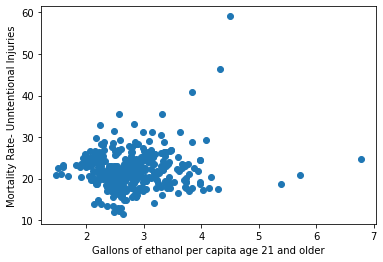

In [31]:
plt.scatter(x_values4,y_values4)
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate- Unntentional Injuries')
plt.show()

In [32]:

corr4= st.pearsonr(x_values4,y_values4)
corr1= st.pearsonr(x_values1,y_values1)
corr2= st.pearsonr(x_values2,y_values2)
corr3= st.pearsonr(x_values3,y_values3)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values4, y_values4)
regress_values4 = x_values4 * slope + intercept
line_eq2 = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))




print(f"The correlation between ethanol consumption and mortality rate for all beverages is {corr4}")
print(f"The correlation between ethanol consumption and mortality rate for spirits is {corr1}")
print(f"The correlation between ethanol consumption and mortality rate for wine is {corr2}")
print(f"The correlation between ethanol consumption and mortality rate for beer is {corr3}")

The correlation between ethanol consumption and mortality rate for all beverages is (0.11226275991942818, 0.026241335241927646)
The correlation between ethanol consumption and mortality rate for spirits is (0.16205988920464404, 0.0012833185780416227)
The correlation between ethanol consumption and mortality rate for wine is (-0.2934848854584356, 3.1596592781603598e-09)
The correlation between ethanol consumption and mortality rate for beer is (0.24990899149973952, 5.389787395794401e-07)


Text(0.5, 1.0, 'Ethanol consumption Vs Mortality Rate for Unintentional Injuries')

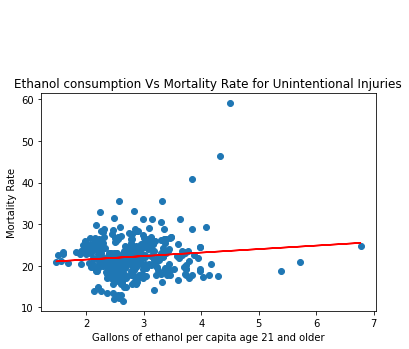

In [33]:
plt.scatter(x_values4,y_values4)
plt.plot(x_values4,regress_values4,"r-")
plt.annotate(line_eq2,(4.5,80),fontsize=12,color="red")
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate')
plt.title("Ethanol consumption Vs Mortality Rate for Unintentional Injuries")